In [1]:
# One Reference:
#     https://github.com/Bjarten/early-stopping-pytorch/blob/master/MNIST_Early_Stopping_example.ipynb

In [1]:
import torch
import pandas  as pd
import numpy as np

from sklearn.model_selection import train_test_split


In [2]:
import os
os.getcwd()



'c:\\Users\\manpresingh\\OneDrive - Microsoft\\Personal\\PyTorch_and_Advanced NLP'

In [3]:
import pandas as pd

data = pd.read_csv("c://Users/manpresingh/OneDrive - Microsoft/Personal/PyTorch_and_Advanced NLP/creditcard.csv")

In [4]:
data.shape

(284807, 31)

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
target = ['Class']

In [7]:
X = data[features]
y = data[target]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=100, test_size=.3)

In [9]:
X_train.shape, y_train.shape

((199364, 29), (199364, 1))

In [10]:
y_train.value_counts()

Class
0        199020
1           344
Name: count, dtype: int64

In [11]:
y_test.value_counts()

Class
0        85295
1          148
Name: count, dtype: int64

In [12]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [50]:
X_train_torch = torch.tensor(X_train.values, dtype=torch.float32)
X_test_torch = torch.tensor(X_test.values, dtype=torch.float32)

y_train_torch = torch.tensor(y_train.values, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.values, dtype=torch.float32)

In [51]:
y_train_torch, X_train_torch

(tensor([[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]),
 tensor([[ 2.0535e+00, -1.4988e-01, -1.0922e+00,  ..., -7.5806e-02,
          -6.3325e-02,  1.2900e+00],
         [ 1.4948e-01,  1.1120e+00, -3.9154e-01,  ...,  2.2917e-01,
           8.6294e-02,  2.6900e+00],
         [ 2.1454e+00,  2.1524e-01, -2.2216e+00,  ..., -8.3225e-02,
          -6.9468e-02,  4.5500e+00],
         ...,
         [ 9.8429e-01, -9.5187e-01,  7.6085e-01,  ...,  4.5741e-02,
           6.1764e-02,  1.7000e+02],
         [ 6.9952e-01, -1.5581e+00,  2.8675e-01,  ..., -6.5344e-02,
           7.5715e-02,  3.3840e+02],
         [-3.5129e-01,  1.1838e+00,  5.3079e-01,  ..., -3.7212e-02,
          -4.7996e-01,  1.7900e+00]]))

In [52]:
train_dataset = torch.utils.data.TensorDataset(X_train_torch, y_train_torch)
# or
# This is method2:
train_dataset2= list(zip(X_train_torch, y_train_torch))

test_dataset = torch.utils.data.TensorDataset(X_test_torch, y_test_torch)

In [53]:
train_sampler = torch.utils.data.sampler.SubsetRandomSampler(list(X_train.index))


test_sampler = torch.utils.data.sampler.SubsetRandomSampler(list(X_test.index))

In [54]:
train_dataloader = torch.utils.data.DataLoader(train_dataset2, batch_size=128,
                                               sampler=train_sampler,
                                               num_workers=0)

test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=128,
                                              sampler=test_sampler,
                                              num_workers=0)

In [55]:
X_train_torch.shape

torch.Size([199364, 29])

In [56]:
torch.utils.data.Dataset()

In [57]:
class MyNetwork(torch.nn.Module):
    def __init__(self, num_of_features, dropout_rate):
        super(MyNetwork, self).__init__() 
        
        self.linear1 = torch.nn.Linear(num_of_features, 256)
        # self.batchnorm1 = torch.nn.BatchNorm1d(256)
        self.relu1 = torch.nn.ReLU()
        self.dropout1 = torch.nn.Dropout(dropout_rate/2)
        
        self.linear2 = torch.nn.Linear(256, 128)
        # self.batchnorm2 = torch.nn.BatchNorm1d(128)
        self.relu2 = torch.nn.ReLU()
        self.dropout2 = torch.nn.Dropout(dropout_rate)
        
        # self.linear3 = torch.nn.Linear(512,256)        
        # self.relu3 = torch.nn.ReLU()
        # self.dropout3 = torch.nn.Dropout(dropout_rate) 
        
        self.final_layer = torch.nn.Linear(128,1)

    def forward(self,x_train):
        x = self.linear1(x_train)
        # x = self.batchnorm1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.linear2(x)
        # x = self.batchnorm1(x)
        x = self.relu2(x)
        x = self.relu2(x)
        # x = self.linear3(x)
        # x = self.relu3(x)
        # x = self.dropout3(x)
        x=self.final_layer(x)
        pred = torch.sigmoid(x)
        return pred


In [88]:
mymodel = MyNetwork(29, .5)

In [89]:
mymodel

MyNetwork(
  (linear1): Linear(in_features=29, out_features=256, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.25, inplace=False)
  (linear2): Linear(in_features=256, out_features=128, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.5, inplace=False)
  (final_layer): Linear(in_features=128, out_features=1, bias=True)
)

In [90]:
criterion = torch.nn.BCELoss()
optim = torch.optim.Adam(mymodel.parameters(), lr=.001)

In [91]:
n_total_steps = len(train_dataloader)
n_total_steps

1558

In [92]:
import copy

In [93]:
best_loss = float('inf')

In [96]:
loss_dict={
        'train_loss':[],
        'test_loss':[]
}
num_epochs=10
for epoch in range(num_epochs):
        for i, (x_data, y) in enumerate(train_dataloader):
                mymodel.train()
                pred = mymodel(x_data)
                
                loss = criterion(pred, y)
                
                optim.zero_grad()
                
                loss.backward()
                
                optim.step()
                
                if (i+1)%200 == 0:
                        print(f'{epoch+1} of {num_epochs} ; step: {i+1} of {n_total_steps} ; Trainloss = {loss.item():.4f}')
     
        
        
        with torch.no_grad():
                output = mymodel(X_train_torch)
                trainloss = criterion(output, y_train_torch)
        print(f"========= Complete TestLoss = {val_loss.item():.4f}\n")
        
        loss_dict['train_loss'].append(trainloss.item())
        
        mymodel.eval()
        with torch.no_grad():
                val_output = mymodel(X_test_torch)
                val_loss = criterion(val_output, y_test_torch)
        print(f"========= Complete TestLoss = {val_loss.item():.4f}\n")
        loss_dict['test_loss'].append(val_loss.item())
         
         
        # Early Stopping Code        
        if val_loss < best_loss:
                best_loss=val_loss
                best_model_weights = copy.deepcopy(mymodel.state_dict())
                patience = 10 
        else:
                patience=-1
                if patience==0:
                        break;  
                 
    

1 of 10 ; step: 200 of 1558 ; Trainloss = 0.0008
1 of 10 ; step: 400 of 1558 ; Trainloss = 0.0050
1 of 10 ; step: 600 of 1558 ; Trainloss = 0.0001
1 of 10 ; step: 800 of 1558 ; Trainloss = 0.0002
1 of 10 ; step: 1000 of 1558 ; Trainloss = 0.2630
1 of 10 ; step: 1200 of 1558 ; Trainloss = 0.0004
1 of 10 ; step: 1400 of 1558 ; Trainloss = 0.0000
========= Complete TestLoss = 0.0048

========= Complete TestLoss = 0.0244

2 of 10 ; step: 200 of 1558 ; Trainloss = 0.0003
2 of 10 ; step: 400 of 1558 ; Trainloss = 0.0001
2 of 10 ; step: 600 of 1558 ; Trainloss = 0.0003
2 of 10 ; step: 800 of 1558 ; Trainloss = 0.0002
2 of 10 ; step: 1000 of 1558 ; Trainloss = 0.0006
2 of 10 ; step: 1200 of 1558 ; Trainloss = 0.0000
2 of 10 ; step: 1400 of 1558 ; Trainloss = 0.0007
========= Complete TestLoss = 0.0244

========= Complete TestLoss = 0.0082

3 of 10 ; step: 200 of 1558 ; Trainloss = 0.0001
3 of 10 ; step: 400 of 1558 ; Trainloss = 0.0001
3 of 10 ; step: 600 of 1558 ; Trainloss = 0.0001
3 of 10 ;

In [101]:
len(loss_dict['train_loss'])

10

In [98]:
import matplotlib.pyplot as plt

In [ ]:
range(1, len(loss_))

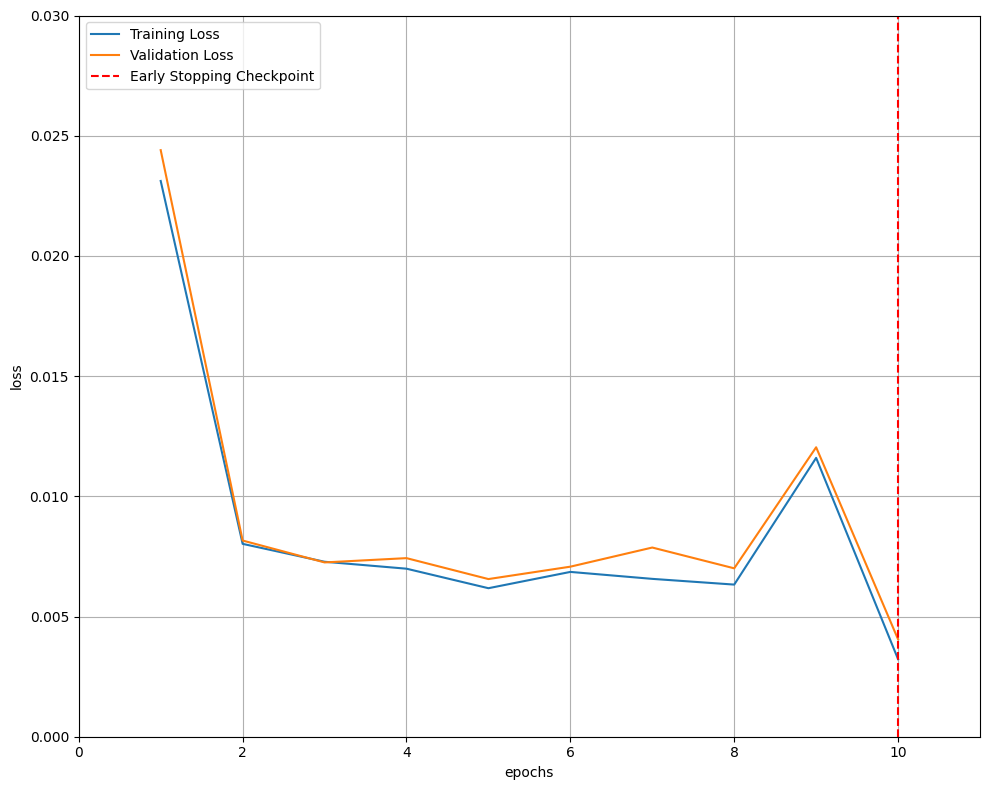

In [106]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(loss_dict['train_loss'])+1),loss_dict['train_loss'], label='Training Loss')
plt.plot(range(1,len(loss_dict['test_loss'])+1),loss_dict['test_loss'],label='Validation Loss')

# find position of lowest validation loss
minposs = loss_dict['test_loss'].index(min(loss_dict['test_loss']))+1 
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim(0, 0.03) # consistent scale
plt.xlim(0, len(loss_dict['train_loss'])+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('loss_plot.png', bbox_inches='tight')

In [107]:
pred_test = mymodel(X_test_torch)

In [108]:
pd.DataFrame(pred_test.detach().numpy())

,0
0,1.099458e-03
1,3.668611e-05
2,1.887054e-08
3,2.322685e-07
4,2.372441e-03
...,...
85438,2.916290e-06
85439,3.285426e-06
85440,1.751034e-05
85441,3.538383e-04


In [109]:
y_test

,Class
0,0
1,0
2,0
3,0
4,0
...,...
85438,0
85439,0
85440,0
85441,0


In [110]:
from sklearn.metrics import roc_auc_score

In [111]:
roc_auc_score(y_test, pd.DataFrame(pred_test.detach().numpy()))

0.9606552299412373